In [1]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np
from scipy.stats import sem
from random import choice

#Data preprocessing and trasformation (ETL)
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
#Visualization

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import metrics

La sfida chiave contro la sua individuazione è come classificare i tumori in maligni (cancerosi) o benigni (non cancerosi). 
L'obiettivo è quello di completare l'analisi della classificazione di questi tumori utilizzando i vari metodi visti a lezione partendo dal percettrone fino ad arrivare al random forest utilizzando il set di dati (diagnostico) del cancro al seno del Wisconsin. In questo caso specifico la valutazione di performace da utilizzare per la valutazione del modello sarà la recall.

# ETL preprocessing

In [2]:
breast_dataset = pd.read_csv('OneDrive/Documenti/GitHub/MDS-python/Marcello Brambilla/breast-cancer.csv')

In [3]:
breast_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
breast_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
breast_dataset['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


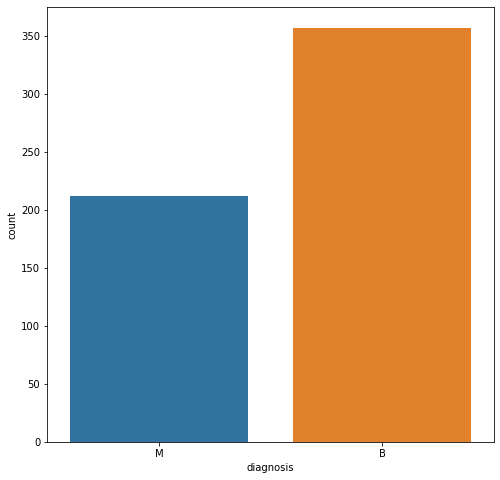

In [7]:
fig = plt.figure(figsize=(8, 8))
sns.countplot(breast_dataset['diagnosis'])
plt.show()

In [8]:
breast_label = breast_dataset['diagnosis'].map(
    {'B':0,
     'M':1
    }
).values
breast_dataset.drop(columns=['id','diagnosis'], inplace = True)

in questo caso ho applicato il metodo map per trasformare la colonna delle etichette da 'B' e 'M' in valori binari e poi successivamente ho eliminato le colonne inutili e la colonna delle etichette.

In [9]:
breast_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

da queste informazioni noto che non ha dati mancanti per nessun soggetto e che il mio dataset non è molto grande, perchè possiede solamente 569 righe

In [10]:
matrice_correlazione = breast_dataset.corr()

In [11]:
matrice_correlazione['radius_mean'].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0.097317
symmetry_se               -0

In [12]:
data_preprocessing = ColumnTransformer([
    ('scaler',StandardScaler(), ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
    ],
    remainder = 'passthrough'
)

Applico lo standard scaler a tutte le colonne del mio dataset (ho solo dati numerici e nessun dato categorico). Ho scelto lo standard scaler piuttosto che un Robust Scaler, perchè se per esempio prendo la colonna compactness_mean la media è 0.096360 la mediana è 0.095870	e sono molto vicine e anche gli altri valori sembrano tutti concentrati attorno alla media, quindi ho una gaussiana quindi il Robust scaler non servirebbe perchè non ho molti outliers su cui lavorare.

In [13]:
feature_matrix = data_preprocessing.fit_transform(breast_dataset)

In [14]:
fm = pd.DataFrame(feature_matrix)
fm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# TRAINING E TEST SETS
dividiamo il dataset in training e test sets in modo tale che il test set contenga il 20% dei record.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, breast_label, test_size = 0.2, random_state = 42)

# PERCEPTRON

In [16]:
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(feature_matrix, breast_label, test_size = 0.2)
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train) # apprendo su training
    predicted_test = perceptron.predict(X_test) # predico sul test
    print(np.sum(predicted_test == y_test)/len(y_test))

0.956140350877193
0.9385964912280702
0.9736842105263158
0.9824561403508771
0.9649122807017544
0.9473684210526315
0.9649122807017544
0.9736842105263158
0.9385964912280702
0.956140350877193


In [17]:
train_sizes, train_scores, test_scores = learning_curve(perceptron,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5, 
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

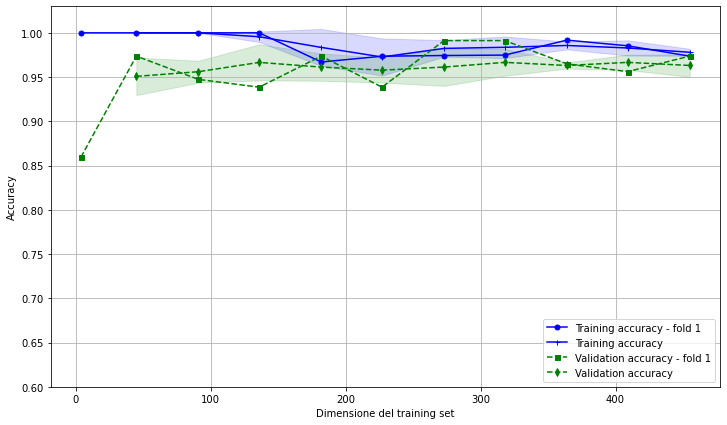

In [18]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training accuracy - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

In [19]:
train_sizes, train_scores, test_scores = learning_curve(perceptron,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       scoring = 'recall', 
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

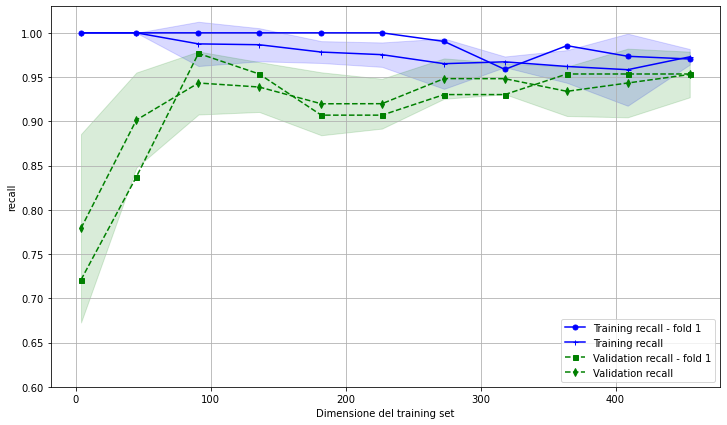

In [20]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training recall - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training recall')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation recall')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('recall')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

## STEP 4: cross-validation

Utilizzanod 5-fold cross-validation devo valutare le performance dei diversi modelli. Nel dettaglio si devono utilizzare come misure di performance:
- accuracy
- precision
- recall 
- f1-score



 # continuo con il PERCEPTRON

In [21]:
p = Perceptron()
cvs = cross_val_score(p, X_train, y_train, cv = 5)

In [22]:
cvs

array([0.97802198, 0.97802198, 0.9010989 , 0.93406593, 0.96703297])

In [23]:
np.mean(cvs)

0.9516483516483516

In [24]:
np.std(cvs)

0.029974025707661205

In [25]:
y_train_predicted = cross_val_predict(p, X_train, y_train, cv = 5)

In [26]:
as1 = accuracy_score(y_train, y_train_predicted, normalize=True)
as1

0.9516483516483516

In [27]:
confusion_matrix(y_train, y_train_predicted)

array([[274,   9],
       [ 13, 159]], dtype=int64)

In [28]:
precision_score(y_train, y_train_predicted)

0.9464285714285714

In [29]:
recall_score(y_train, y_train_predicted)

0.9244186046511628

In [30]:
f1_score(y_train, y_train_predicted)

0.9352941176470587

Le misure di performance (precision_score, recall_score, f1_score) coincidono per il fatto che all'interno della mia confusion matrix il numero di falsi positivi e falsi negativi coincide e questo va influenzare tutti e tre i valori in modo che siano uguali e infatti possiede anche un f1_score molto alto. 

# Logistic Regression

In [31]:
logit_cls = LogisticRegression(max_iter = 1000)
y_scores = cross_val_predict(logit_cls, X_train, y_train, cv = 5)

In [32]:
cvs_log = cross_val_score(logit_cls, X_train, y_train, cv = 5)

In [33]:
cvs_log

array([0.98901099, 0.96703297, 0.97802198, 0.97802198, 0.97802198])

In [34]:
prec, recall, soglia = precision_recall_curve(y_train, y_scores)

In [35]:
Recall_logit_cls = recall_score(y_train, y_scores)
print (Recall_logit_cls)

0.9534883720930233


In [36]:
precision_score(y_train, y_scores), recall_score(y_train, y_scores), f1_score(y_train, y_scores)

(0.9879518072289156, 0.9534883720930233, 0.9704142011834319)

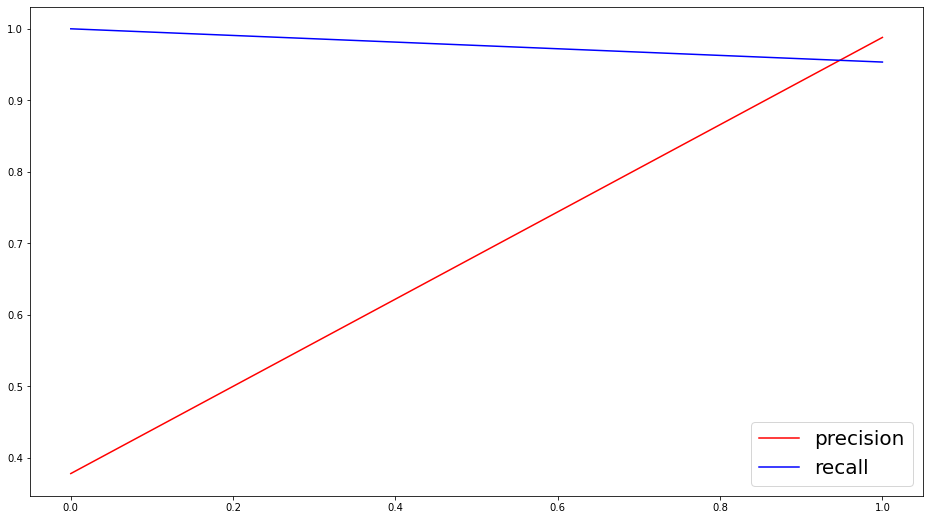

In [37]:
fig_prc = plt.figure(figsize=(16,9))
ax = fig_prc.add_subplot()
ax.plot(soglia, prec[:-1], 'r', label = 'precision')
ax.plot(soglia, recall[:-1], 'b', label = 'recall')
ax.legend(fontsize=20)

Oppure posso visualizzare la precision in funzione della recall

Text(0, 0.5, 'Precision')

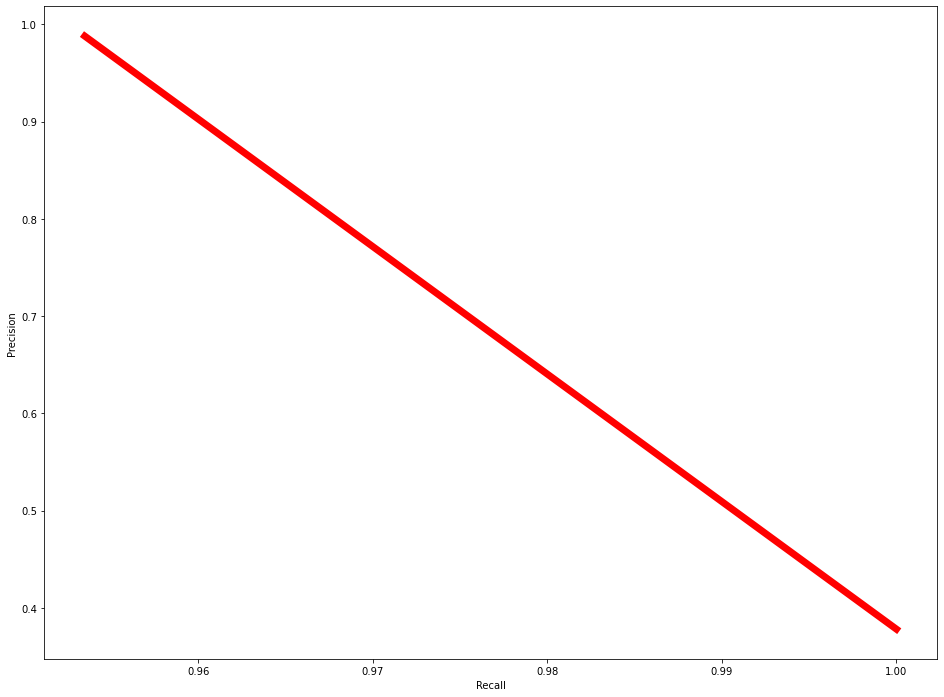

In [38]:
fig_prf = plt.figure(figsize=(16,12))
ax = fig_prf.add_subplot()
ax.plot(recall[:-1], prec[:-1], 'r', label = 'precision', lw = 7)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

In [39]:
train_sizes, train_scores, test_scores = learning_curve(logit_cls,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

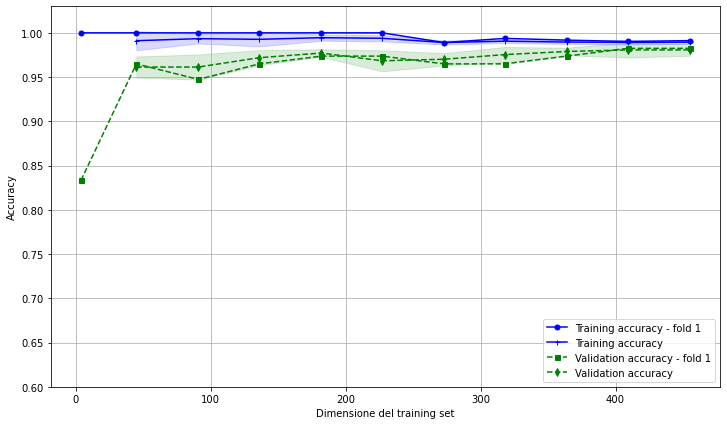

In [40]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training accuracy - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

In [41]:
train_sizes, train_scores, test_scores = learning_curve(logit_cls,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       scoring = 'recall',
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

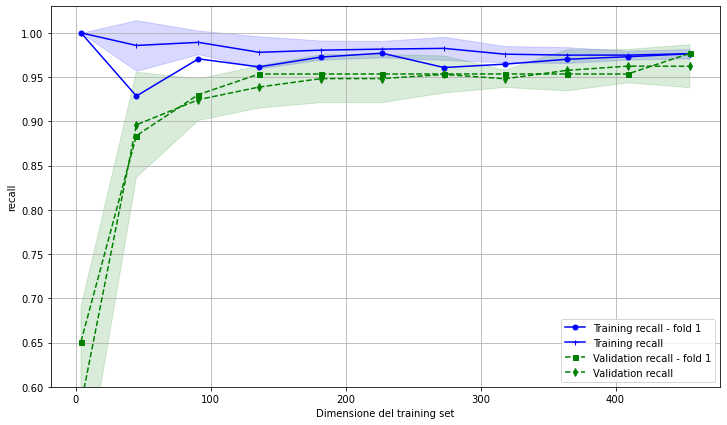

In [42]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training recall - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training recall')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation recall')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('recall')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

# SUPPORT VECTOR MACHINE (SVM)

In [43]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Training SVM per C = 0.01 0
Training per 0.01 finito
Training SVM per C = 0.1 1
Training per 0.1 finito
Training SVM per C = 1 2
Training per 1 finito
Training SVM per C = 10 3
Training per 10 finito
Training SVM per C = 100 4
Training per 100 finito


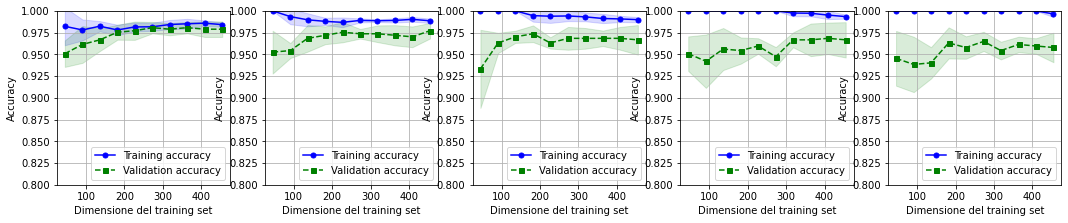

In [44]:
Cs = [0.01, 0.1, 1, 10, 100]# definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(svm_cls,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes=np.linspace(0.1,1,10),
                                                       cv = 5, n_jobs=-1,
                                                       shuffle = True)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [45]:
y_train_predicted = cross_val_predict(svm_cls, X_train, y_train, cv = 5)

In [46]:
recall_score(y_train, y_train_predicted)

0.936046511627907

Training SVM per C = 0.01 0
Training per 0.01 finito
Training SVM per C = 0.1 1
Training per 0.1 finito
Training SVM per C = 1 2
Training per 1 finito
Training SVM per C = 10 3
Training per 10 finito
Training SVM per C = 100 4
Training per 100 finito


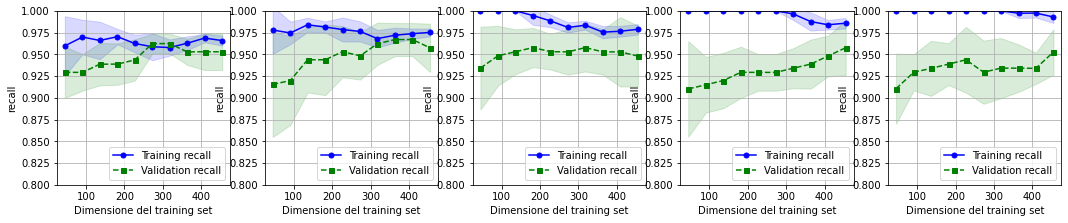

In [47]:
Cs = [0.01, 0.1, 1, 10, 100]# definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(svm_cls,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes=np.linspace(0.1,1,10),
                                                       cv = 5,
                                                       scoring = 'recall',
                                                       n_jobs=-1,
                                                       shuffle = True)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training recall')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('recall')
    ax.legend(loc='lower right')

# DECISION TREE

In [48]:
min_leaf = [5, 10, 15, 20, 25, 30]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 15
fatto 20
fatto 25
fatto 30


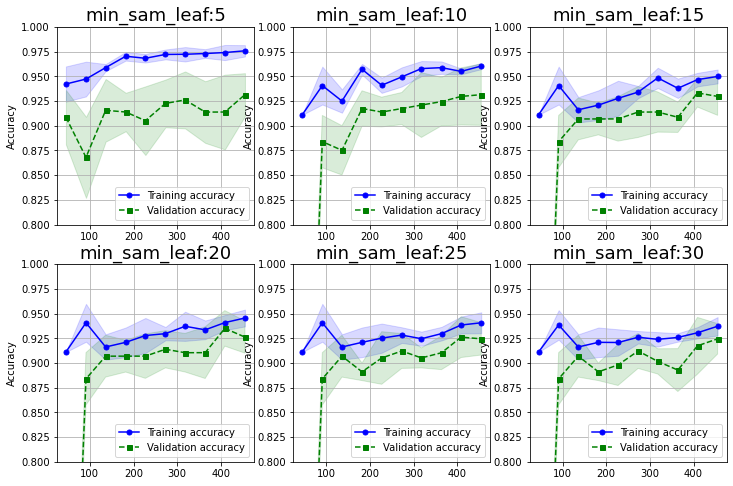

In [49]:
fig= plt.figure(figsize=(12, 8))
for i in range(6):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

In [50]:
y_train_predicted = cross_val_predict(dt_mlf, X_train, y_train, cv = 5)

In [51]:
recall_score(y_train, y_train_predicted)

0.877906976744186

In [52]:
min_leaf = [5, 10, 15, 20, 25, 30]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=feature_matrix,
                                                       y=breast_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       scoring ='recall', 
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 15
fatto 20
fatto 25
fatto 30


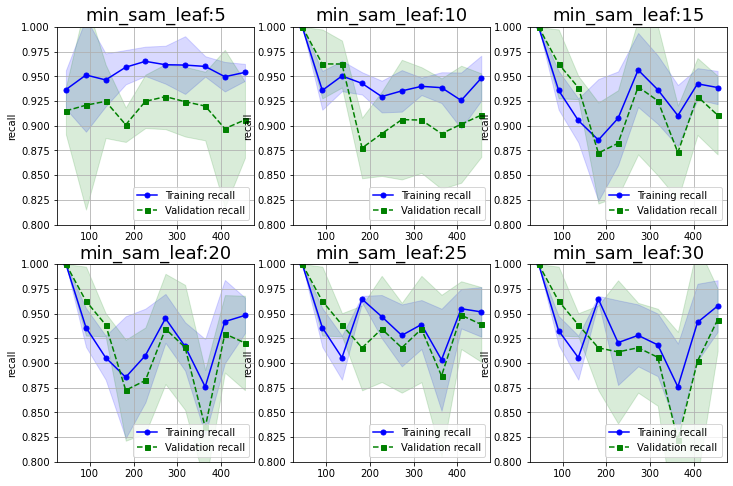

In [53]:
fig= plt.figure(figsize=(12, 8))
for i in range(6):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training recall')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('recall')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

# Random Forest

In [54]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, breast_label, test_size=0.2, stratify=breast_label)

In [55]:
len(y_train[y_train == 1])/len(y_train), len(y_test[y_test == 1])/len(y_test)

(0.37362637362637363, 0.3684210526315789)

In [56]:
rnf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
et_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
scores_rnf = cross_val_score(rnf_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
scores_et = cross_val_score(et_clf, X_train, y_train, cv=5, scoring='f1',n_jobs=-1)

In [57]:
rnf_clf.fit(feature_matrix,breast_label)

RandomForestClassifier(max_features=10, max_leaf_nodes=64, n_estimators=250,
                       n_jobs=-1)

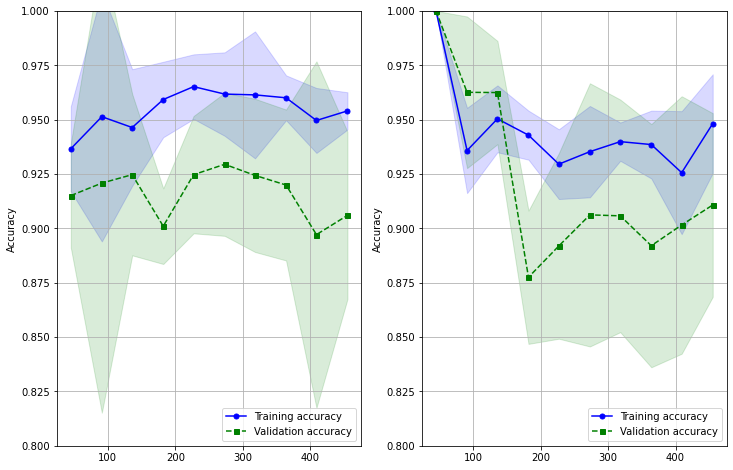

In [58]:
fig= plt.figure(figsize=(12, 8))
for i in range(2):
    ax = fig.add_subplot(121+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [59]:
y_train_predicted = cross_val_predict(rnf_clf, X_train, y_train, cv = 5)

In [60]:
recall_RF = recall_score(y_train, y_train_predicted)
print (recall_RF)

0.9235294117647059


## KNN model

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

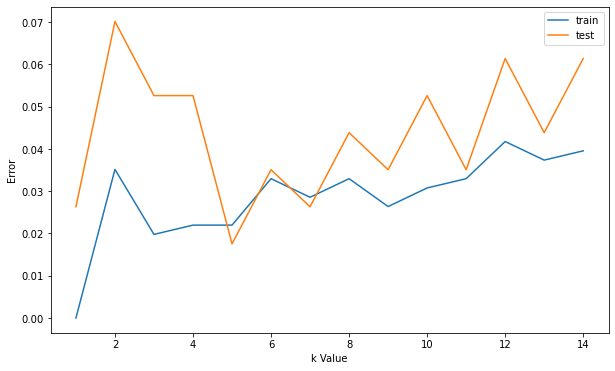

In [62]:
# KNN model
# Find the Best value for K
error1 = []
error2 = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predicted1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_predicted1))
    y_predicted2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_predicted2))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error1, label="train")
plt.plot(range(1, 15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()
# The best key value = 5


In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print(y_test)
print(y_predicted)
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.accuracy_score(y_test, y_predicted)*100)
print(metrics.classification_report(y_test, y_predicted))

[0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0]
[0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0]
[[72  0]
 [ 2 40]]
98.24561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [64]:
recall_knn = metrics.recall_score(y_test, y_predicted, average='micro')
print (recall_knn)

0.9824561403508771


# Conclusioni

 In base ai risultati ottenuti concludo che nessun modello da me implementato sia adatto a risolvere questo tipo di Task nella vita reale, perchè il punteggio di ogni recall per ogni algoritmo implementato non è strettamente vicino all' 1. Questo implica che, come nel caso del KNN dove ottengo il valore di recall più alto pari a 0.9824561403508771, su un campione di 100 persone a 1,754 persone sto diagnosticando un tumore benigno quando invece il tumore è maligno e se applichiamo algoritmo su un campione di 1000 persone ovviamente gli errori salgono a 17,54 e sappiamo che in campo medico non sono ammessi margini di errori così "grandi" perchè si deve puntare al 100% visto che ci si gioca la salute delle persone.

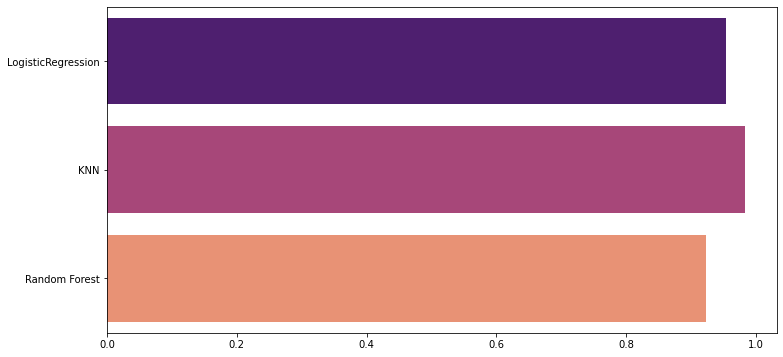

In [65]:
plt.figure(figsize=(12, 6))
model_acc = [Recall_logit_cls, recall_knn, recall_RF]
model_name = ['LogisticRegression', 'KNN', 'Random Forest']
sns.barplot(x=model_acc, y=model_name, palette='magma')
plt.show()